In [16]:
## Import stuff
 
import numpy as np
from sklearn import datasets, linear_model, metrics

In [17]:
## Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data # matrix of dimensions 442x10
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [75]:
def predict(X,w,b):
    """
        returns Predicted Value
        predict(X: np.ndarray, w: np.ndarray,b: float)
                X values     ,    weight    ,bias
    """
    return (np.dot(X,w)+b)
def error(predicted_val,observed_val) -> float:
    """
        returns mean squared error
        error(predicted_val: np.ndarray, observed_val: np.ndarray)
    """
    m = predicted_val.shape[0]
    return np.sum((predicted_val-observed_val)**2)/(2*m)
def gradient(X,predicted_val,observed_val) -> (int,np.ndarray):
    """
        returns gradient 
        gradient(X: np.ndarray,predicted_val: np.ndarray,observed_val: np.ndarray)
    """
    m = predicted_val.shape[0]
    return (np.mean(predicted_val-observed_val),np.dot(X.T,(predicted_val-observed_val)/m))


In [76]:
# train
X = diabetes_X_train
y = diabetes_y_train
# train: init
W = np.zeros((10),dtype=np.float64)  #weight vector,intital feature vector
b = 0

learning_rate = 0.03
epochs = 10001 #no of iterations

error_arr = []
# train: gradient descent
for i in range(epochs):
    # calculate predictions
    predicted_val = predict(X,W,b)
 
    # calculate error and cost (mean squared error)
    mean_squared_error = error(predicted_val,y)
    error_arr.append(mean_squared_error)
    # calculate gradients
    (db,dw) = gradient(X,predicted_val,y) 
    # update parameters
    b,W = b-learning_rate*db,W-learning_rate*dw
 
    # diagnostic output
    if i % 5000 == 0: print("Epoch %d: %f" % (i, mean_squared_error))


Epoch 0: 14734.323460
Epoch 5000: 1815.650341
Epoch 10000: 1614.207413


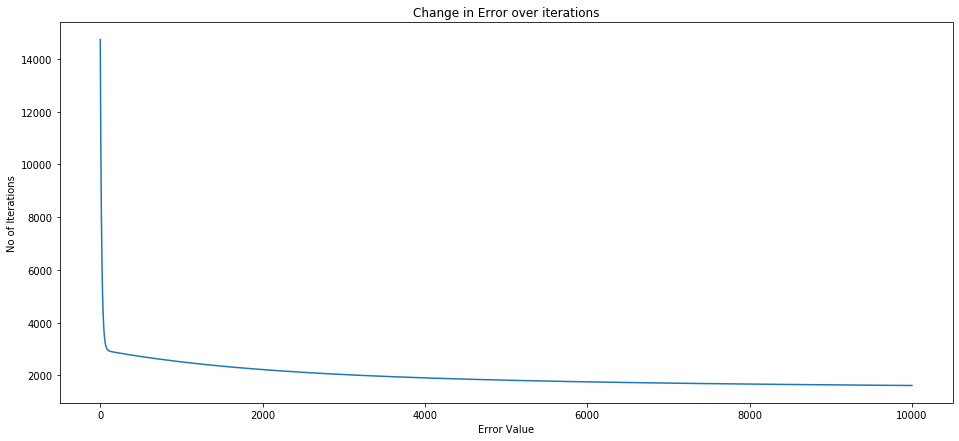

In [77]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,7))
plt.title('Change in Error over iterations')
plt.plot(np.arange(len(error_arr)),error_arr)
plt.xlabel('Error Value')
plt.ylabel('No of Iterations')
plt.show()

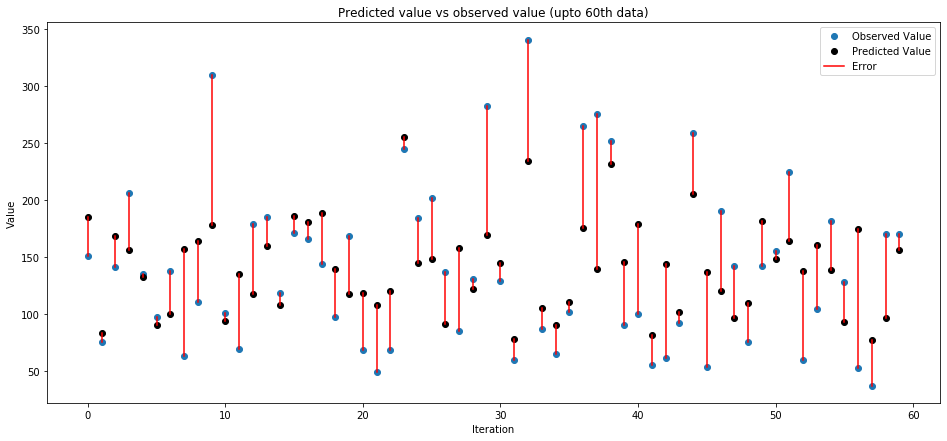

In [78]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,7))
plt.title('Predicted value vs observed value (upto 60th data)')
plt.plot(np.arange(60),y[:60],'o')
plt.plot(np.arange(60),(np.dot(X,W)+b)[:60],'o',color='k')
for i in range(60):
    plt.plot([i,i],[predicted_val[i],y[i]],'r')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(['Observed Value','Predicted Value','Error'])
plt.show()

In [79]:
# test
X = diabetes_X_test
y = diabetes_y_test
 
# calculate predictions + calculate error and cost (same code as above)
predicted_val = predict(X,W,b)
mean_sqaured_error = error(predicted_val,y)*2
cost =  error(predicted_val,y)
print('Coefficients: \n', W)
print("Mean squared error: %.2f" % mean_squared_error)
print("="*120)

Coefficients: 
 [  48.93329374  -65.21900702  318.42819651  219.20315999   22.27158172
  -11.76790076 -171.91639202  146.14322513  275.44311961  145.34663895]
Mean squared error: 1614.21
